In [203]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [204]:
df = pd.read_csv(r'C:\Users\vndlss\Desktop\Test x Python\KingCounty\kc_house_data.csv')

In [205]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [206]:
#1: Question 1) Display the data types of each column using the attribute dtypes,\
#then take a screenshot and submit it, include your code in the image.

In [207]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [208]:
#Question 2) Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(),\
#then use the method describe() to obtain a statistical summary of the data. 

In [209]:
df.drop(['id', 'date'], axis='columns', inplace = True)

In [210]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [211]:
#Question 3) use the method value_counts to count the number of houses with unique floor values,\
#use the method .to_frame() to convert it to a dataframe

In [212]:
df_floors = df.value_counts('floors').to_frame

In [213]:
df_floors

<bound method Series.to_frame of floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
dtype: int64>

In [214]:
#Question 4) use the function boxplot in the seaborn library to produce a plot \
#that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 


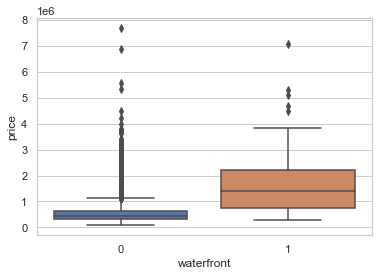

In [215]:
sns.set_theme(style="whitegrid")

box = sns.boxplot(x= 'waterfront', y = 'price', data=df)

In [216]:
#Question 5) Use the function regplot in the seaborn library to determine\
#if the feature sqft_above is negatively or positively correlated with price.

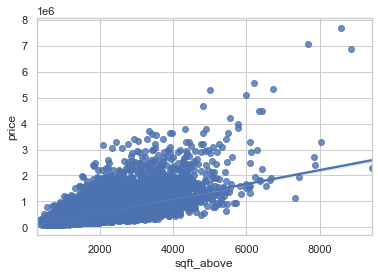

In [217]:
scatter = sns.regplot(x='sqft_above', y='price', data=df)

In [218]:
#Question 6) Fit a linear regression model to predict the price using the feature 'sqft_living' \
#then calculate the R^2. Take a screenshot of your code and the value of the R^2

In [219]:
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)
YHat = lm.predict(X)

In [220]:
b0 = lm.intercept_
b1 = lm.coef_

In [221]:
Price = b0 + b1*X
R2 = lm.score(X,Y)

In [222]:
R2

0.4928532179037931

In [223]:
#Question 7) Fit a linear regression model to predict the 'price' using the list of features:

#"floors" "waterfront" "lat" "bedrooms" "sqft_basement" "view" "bathrooms" "sqft_living15"
#"sqft_above" "grade" "sqft_living"

#Then calculate the R^2. Take a screenshot of your code and the value of the R^2

In [224]:
Z = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement"\
        , "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]

In [225]:
lm.fit (Z, Y)
Yhat2=lm.predict(Z)

In [226]:
R2 = lm.score(Z,Y)
R2

0.657717260844526

In [227]:
#Question 8) Create a pipeline object that scales the data performs a polynomial transform\
#and fits a linear regression model. Fit the object using the features in the question above,\
#then fit the model and calculate the R^2. Take a screenshot of your code and the R^2

In [228]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [229]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]

In [230]:
Pipe = Pipeline(Input)

In [231]:
Z2 = Z.astype(float)
pipe.fit(Z2,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [232]:
ypipe=pipe.predict(Z2)
ypipe[0:10]

array([ 349559.625,  559222.625,  447543.625,  395419.625,  521805.625,
       2034987.625,  210069.125,  291745.25 ,  442343.625,  290042.375])

In [233]:
R2_2 = lm.score(Z2,ypipe)
R2_2

0.8754272139952197

In [234]:
#Question 9) Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and\
#calculate the R^2 using the test data. Take a screenshot for your code and the R^2

In [235]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(X,Y)
Yhat3=RidgeModel.predict(X)

In [239]:
R2_3 = lm.score(Z2,Yhat3)
R2_3

0.6654824915198225

In [240]:
# Question 10) Perform a second order polynomial transform on both the training data and testing data.\
#Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1.\
#Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [246]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["floors", "waterfront", "lat", "bedrooms", "sqft_basement"\
        , "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]])
x_test_pr=pr.fit_transform(x_test[["floors", "waterfront", "lat", "bedrooms", "sqft_basement"\
        , "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]])

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 2162
number of training samples: 19451


In [254]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)
yhat3 = RigeModel.predict(x_test_pr)

In [255]:
print('predicted:', yhat3[0:4])
print('test set :', y_test[0:4].values)

predicted: [572378.02726948 488107.46910862 608667.54657999 679520.79330387]
test set : [ 459000.  445000. 1057000.  732350.]


In [256]:
R2_4 = lm.score(Z2,Yhat3)
R2_4

0.6654824915198225